<a href="https://colab.research.google.com/github/shreya0202/Incremental-Extreme-Learning-Machine/blob/main/IEML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from mlxtend.data import loadlocal_mnist
import time
import math
from numpy.matlib import repmat
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Loading MNIST data
x_train, y_train = loadlocal_mnist(images_path="/content/drive/My Drive/mnist dataset/train-images.idx3-ubyte", labels_path="/content/drive/My Drive/mnist dataset/train-labels.idx1-ubyte")
lb = LabelBinarizer()
y_train_transformed = lb.fit_transform(y_train)
x_test, y_test = loadlocal_mnist(images_path="/content/drive/My Drive/mnist dataset/t10k-images.idx3-ubyte", labels_path="/content/drive/My Drive/mnist dataset/t10k-labels.idx1-ubyte")
y_test_transformed = lb.fit_transform(y_test)


 Target number: 9

 Input number: 



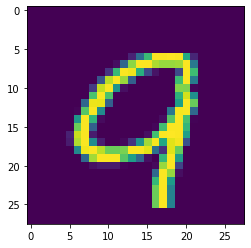

In [ ]:
# Visualize sample data
print("\n Target number: {}".format(y_train[3000]))
pxl = np.reshape(x_train[3000], (28,28))
plt.imshow(pxl)
print("\n Input number: \n")
plt.show()

In [ ]:
# Visualization of accuracies
def visualize(hnode, acc):
  import matplotlib.pyplot as plt
  x_s = hnode 
  y_s = acc

  plt.plot(x_s, y_s, '-b', label='Train Accuracies')
  plt.legend(loc='lower right')
  plt.xlabel("Number of Hidden Nodes")
  plt.ylabel("Training Accuracies")
  plt.show()

In [ ]:
# Training Function
def model_training():
  init_wt = [] 
  beta_wt_list = [] 
  accuracy_ = 0 
  nodes = []
  accuracies = []
  random_nodes = 0
  print("\n\n----------Training----------")
  start_time = time.time() # Initializing start time
  while (accuracy_ < 100 and random_nodes < 150):
      random_nodes += 1 # Adding random hidden node
      nodes.append(random_nodes)
      print("The added hidden node is = {}".format(random_nodes))   
      rand_wt = np.random.rand(len(np.transpose(x_train)), 1) #random wt initialized
      if (random_nodes == 1):
          init_wt = rand_wt
      else:    
          init_wt = np.hstack((init_wt, rand_wt)) # stacking the sequence of input arrays into single weight array

      H = np.dot(x_train, init_wt)
      
      for h in H:
          for j in h:
              # Softmax activation
              ex = np.exp(j - np.max(j))
              j =  np.round(ex / ex.sum(), 4)
          
      inverse_H = np.linalg.pinv(H) # Linear algebra pseudo inverse of matrix
      beta_wt = np.dot(inverse_H, y_train_transformed)
      beta_wt_list = beta_wt
      predicted_y = np.dot(H, beta_wt)
      inv_y = lb.inverse_transform(predicted_y)
      correct_predictions = 0
      total_predictions = len(x_train)
      inv_transform_test = lb.inverse_transform(y_train_transformed)
      
      for i in range(len(y_train)):
          if(inv_transform_test[i] == inv_y[i]):
              correct_predictions += 1
      # Accuracy Calculated       
      accuracy_ = np.round((correct_predictions/total_predictions) * 100, 2)
      
      accuracies.append(accuracy_)
      
      if(random_nodes%10 == 0):
          print("\n For {} hidden-nodes the training classification accuracy is: {}%\n".format(random_nodes, accuracy_))
    
  stop_time = time.time()
  print("\nTotal hidden nodes at the end is: {}".format(random_nodes))
  print("\nTraining time: {} seconds".format(np.round((stop_time - start_time), 3)))
  
  visualize(nodes, accuracies)

  return init_wt, random_nodes

In [ ]:
# Testing Function
def model_testing(init_wts, random_nodes):
  print("\n\n----------Testing----------")
  start_test_time = time.time()
  h_nodes = random_nodes
  a_test = init_wts
  H_test = np.dot(x_test, a_test)

  for h in H_test:
      for j in h:
          # Softmax Activation
          ex = np.exp(j - np.max(j))
          j =  np.round(ex / ex.sum(), 4)
              
  inverse_test_H = np.linalg.pinv(H_test)
  beta_test = np.dot(inverse_test_H, y_test_transformed)
  predicted_test_y = np.dot(H_test, beta_test)
  inverse_y_test = lb.inverse_transform(predicted_test_y)
  correct_predictions = 0
  total_predictions = len(x_test)
  inv_transform_test = lb.inverse_transform(y_test_transformed)

  for i in range(len(y_test)):
      if(inv_transform_test[i] == inverse_y_test[i]):
          correct_predictions += 1
  # Accuracy calculated            
  accuracy_ = np.round((correct_predictions/total_predictions) * 100, 2)

  stop_test_time = time.time()

  print("For {} hidden-nodes the testing classification accuracy : {}%".format(h_nodes, accuracy_))
  print("\nTesting time: {} seconds".format(np.round((stop_test_time - start_test_time), 3)))

In [ ]:
def main():
  init_wts, random_nodes = model_training()
  print()
  model_testing(init_wts, random_nodes)



----------Training----------
The added hidden node is = 1
The added hidden node is = 2
The added hidden node is = 3
The added hidden node is = 4
The added hidden node is = 5
The added hidden node is = 6
The added hidden node is = 7
The added hidden node is = 8
The added hidden node is = 9
The added hidden node is = 10

 For 10 hidden-nodes the training classification accuracy is: 47.31%

The added hidden node is = 11
The added hidden node is = 12
The added hidden node is = 13
The added hidden node is = 14
The added hidden node is = 15
The added hidden node is = 16
The added hidden node is = 17
The added hidden node is = 18
The added hidden node is = 19
The added hidden node is = 20

 For 20 hidden-nodes the training classification accuracy is: 61.54%

The added hidden node is = 21
The added hidden node is = 22
The added hidden node is = 23
The added hidden node is = 24
The added hidden node is = 25
The added hidden node is = 26
The added hidden node is = 27
The added hidden node is =

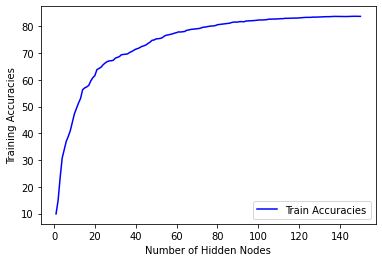




----------Testing----------
For 150 hidden-nodes the testing classification accuracy : 85.35%

Testing time: 24.11 seconds


In [ ]:
main()